In [1]:
import jax.numpy as np
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp

import lineax
import jax
import optax
import optimistix

from make_trace import MakePulse, apply_noise
from make_pulse import GaussianAmplitude, PolynomialPhase

from utilities import MyNamespace

In [15]:
pulse_maker = MakePulse(N=128*10, Delta_f=None)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, 
                        coefficients = np.array([0.5, 0, 000]))

amp = GaussianAmplitude(central_frequency = central_f, 
                        amplitude = np.array([1.0]), 
                        fwhm = np.array([0.1]))

time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))





central_f = np.array([0.51])
phase = PolynomialPhase(central_frequency = central_f, 
                        coefficients = np.zeros(3))

amp = GaussianAmplitude(central_frequency = central_f, 
                        amplitude = np.array([1.0]), 
                        fwhm = np.array([0.01]))


time_gate, pulse_t_gate, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))

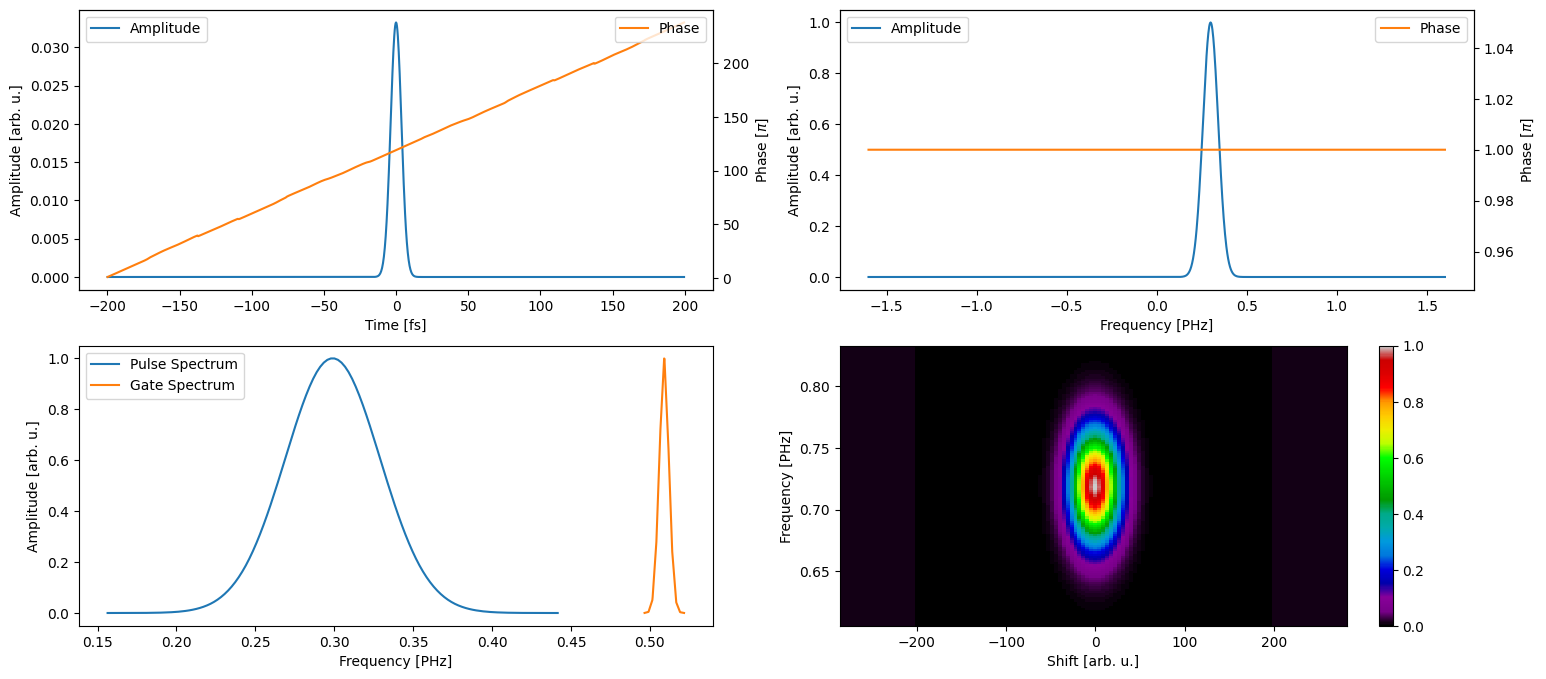

In [16]:
time, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, nonlinear_method="sd", 
                                                          scale_time_range=5, N=128, xfrog=True, 
                                                          gate=(frequency_gate, pulse_f_gate),
                                                          interpolate_fft_conform=True, 
                                                          cut_off_val=1e-2,ifrog=False)#, frequency_range=(0,1))

#trace = apply_noise(trace, scale_val=(0.05, 0.05), additive_noise=True, multiplicative_noise=True)

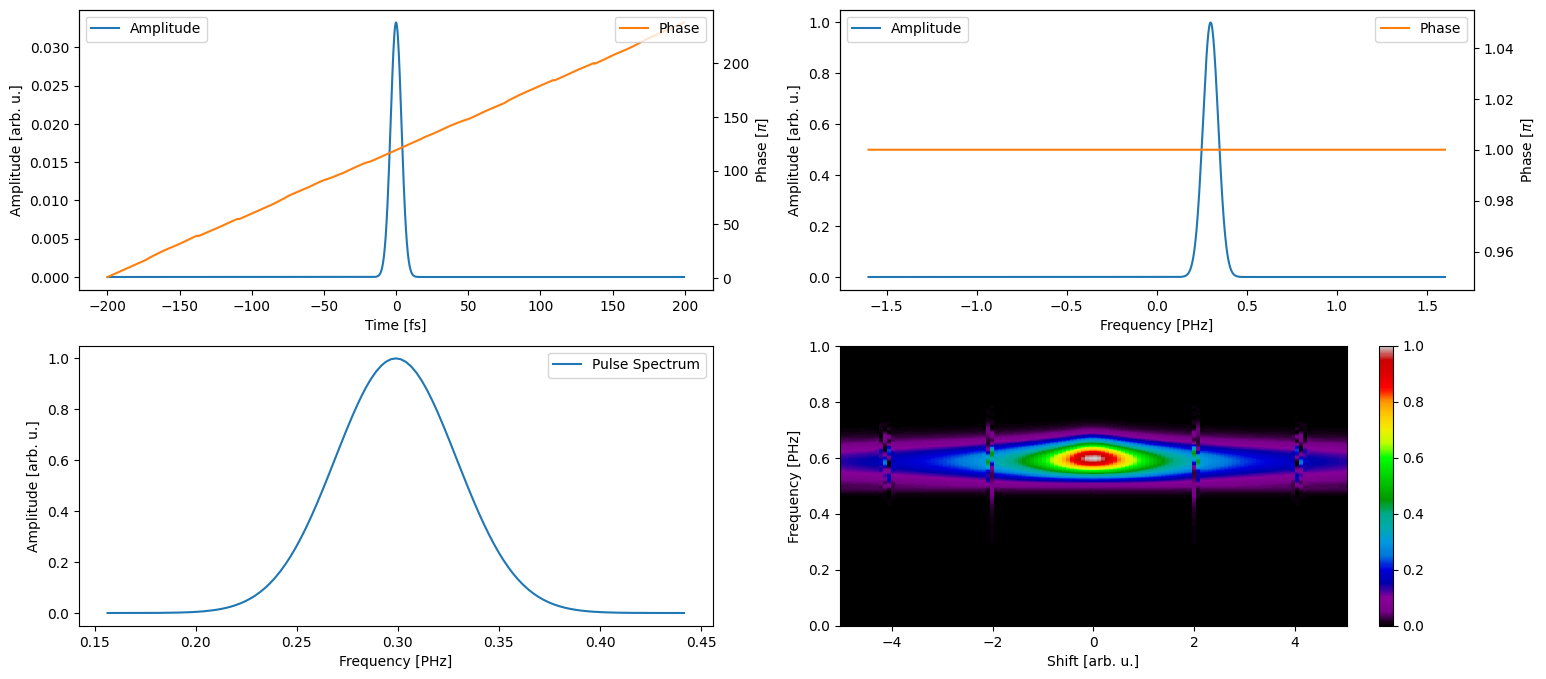

In [19]:
z_arr=np.linspace(-5, 5, 128)
z_arr, frequency, trace, spectra = pulse_maker.generate_dscan(z_arr, time_inp, frequency_inp, pulse_t_inp, pulse_f_inp,
                                                              nonlinear_method="shg", 
                                                              N=128*6, cut_off_val=1e-3, frequency_range=(0,1))


#trace = apply_noise(trace, scale_val=0.01, additive_noise=True, multiplicative_noise=False)

# if there are weird stripes in the trace -> set Deltaf=2 somehow thats needed

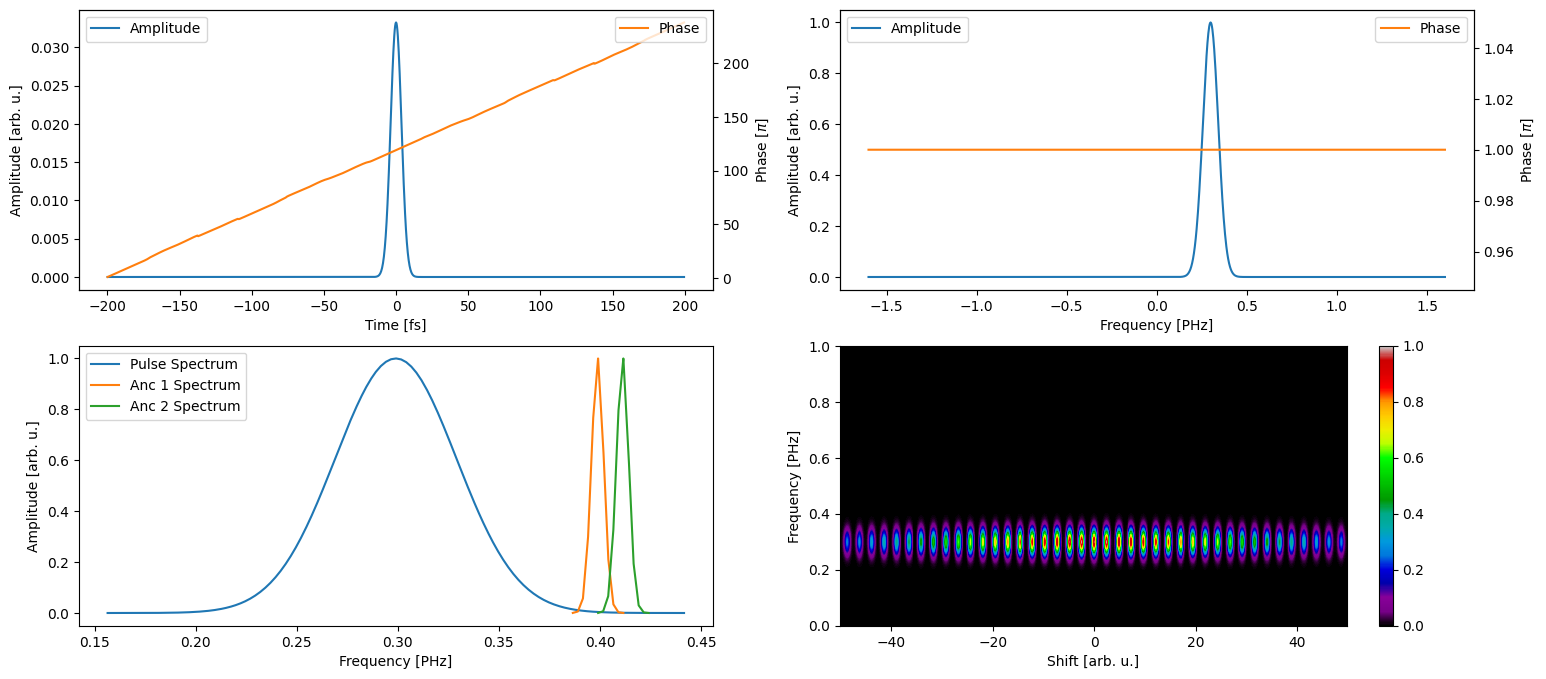

In [24]:
central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, 
                        coefficients = np.array([0.5, 0, 000]))

amp = GaussianAmplitude(central_frequency = central_f, 
                        amplitude = np.array([1.0]), 
                        fwhm = np.array([0.1]))

time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))

input_pulses = pulse_maker.pulses



central_f = np.array([0.4])
phase = PolynomialPhase(central_frequency = central_f, 
                        coefficients = np.zeros(3))

amp = GaussianAmplitude(central_frequency = central_f, 
                        amplitude = np.array([1.0]), 
                        fwhm = np.array([0.01]))

_, _, frequency_gate_1, pulse_f_gate_1 = pulse_maker.generate_pulse((amp, phase))


central_f = np.array([0.41])
phase = PolynomialPhase(central_frequency = central_f, 
                        coefficients = np.zeros(3))

amp = GaussianAmplitude(central_frequency = central_f, 
                        amplitude = np.array([1.0]), 
                        fwhm = np.array([0.01]))

_, _, frequency_gate_2, pulse_f_gate_2 = pulse_maker.generate_pulse((amp, phase))




time, frequency, trace, spectra=pulse_maker.generate_2dsi(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "pg", xfrog=True,
                                                          anc=((frequency_gate_1, pulse_f_gate_1),
                                                               (frequency_gate_2, pulse_f_gate_2)), 
                                                          N=256*4, scale_time_range=0.25, plot_stuff=True, cut_off_val=0.001, frequency_range=(0, 1))




In [10]:
from classic_algorithms_2dsi import DirectReconstruction

In [11]:
dr = DirectReconstruction(time, frequency, trace, "pg", True, 0.4, 0.405).use_measured_spectrum(spectra.pulse[0], spectra.pulse[1])
anc1 = dr.get_anc_pulse(frequency_gate_1, pulse_f_gate_1, anc_no=1)
anc2 = dr.get_anc_pulse(frequency_gate_2, pulse_f_gate_2, anc_no=2)

dr.use_windowing = False#"hamming"

population = dr.create_initial_population(1)
final_result = dr.run(population, no_iterations=1)

2dsi doesnt have to be a xcorr only method


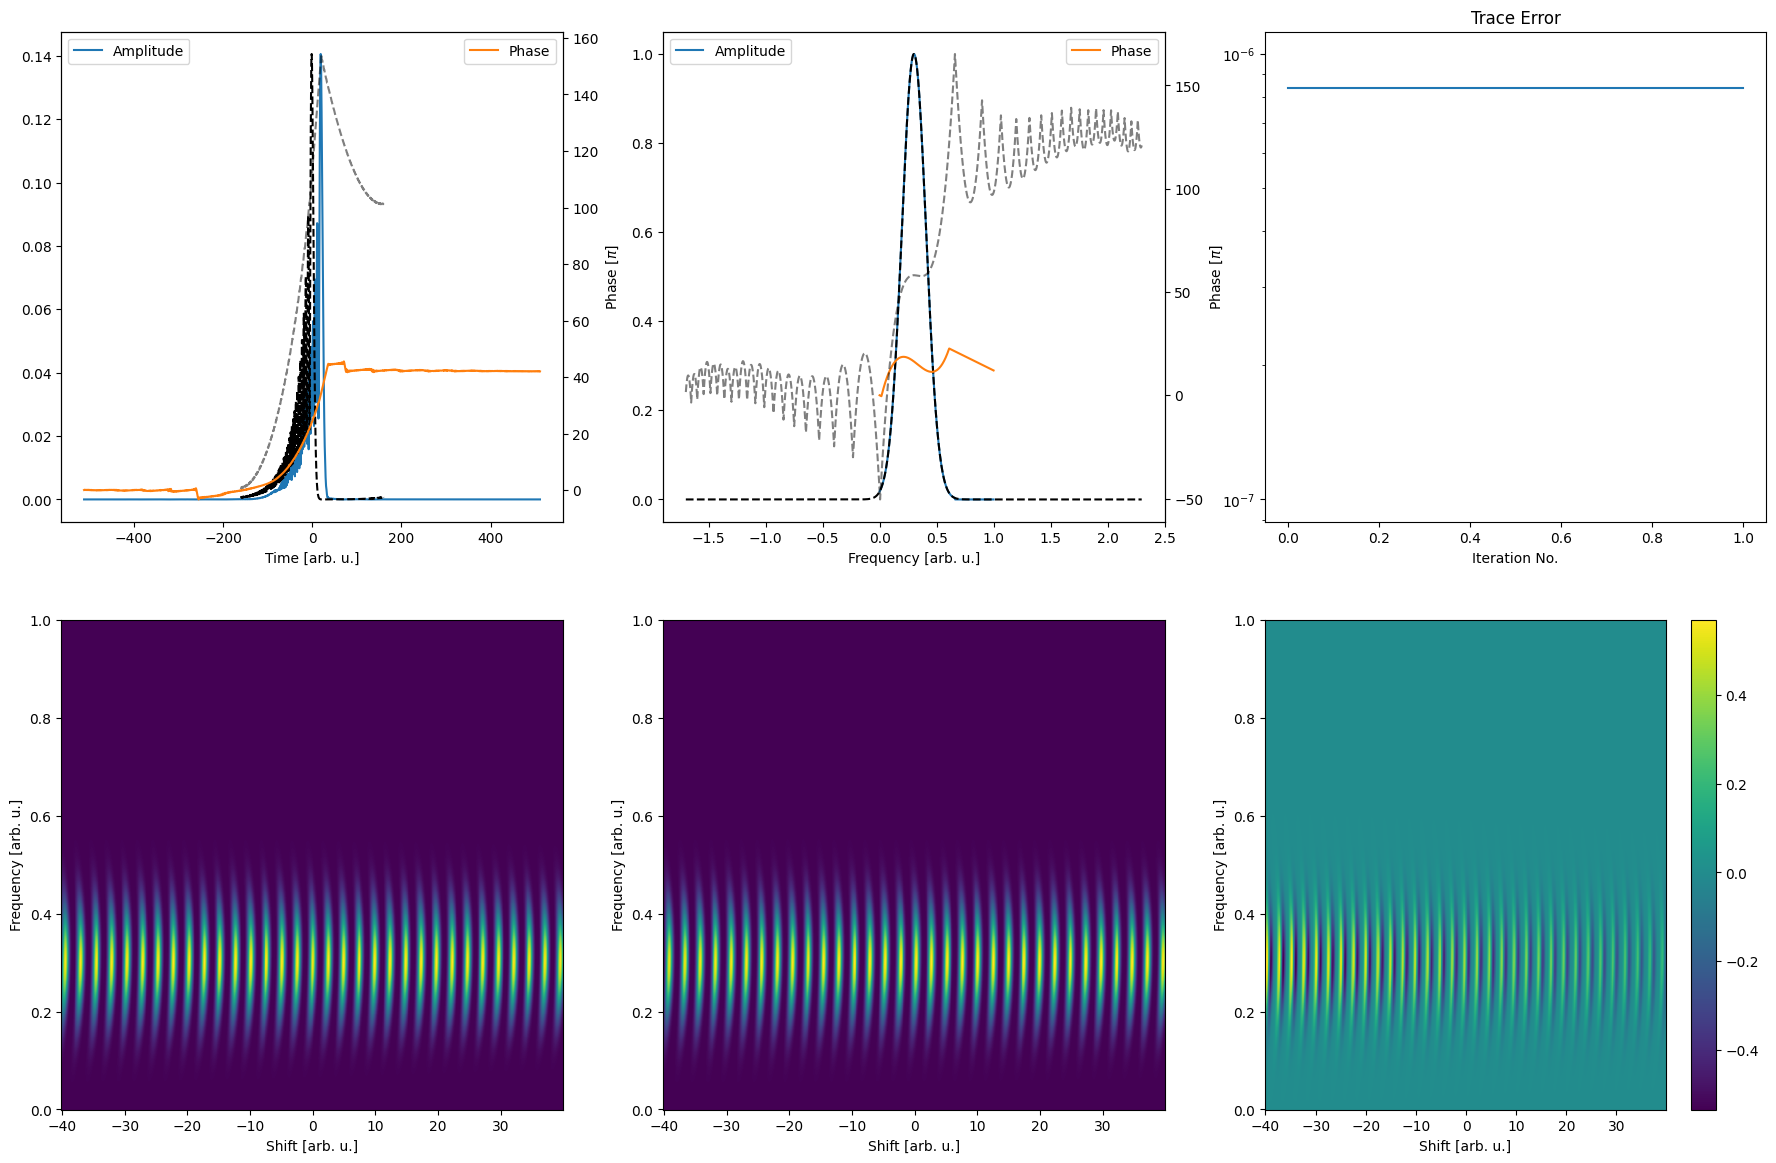

In [12]:
dr.plot_results(final_result, exact_pulse=input_pulses)

In [4]:
from classic_algorithms_frog import Vanilla, LSGPA, GeneralizedProjection, TimeDomainPtychography, COPRA

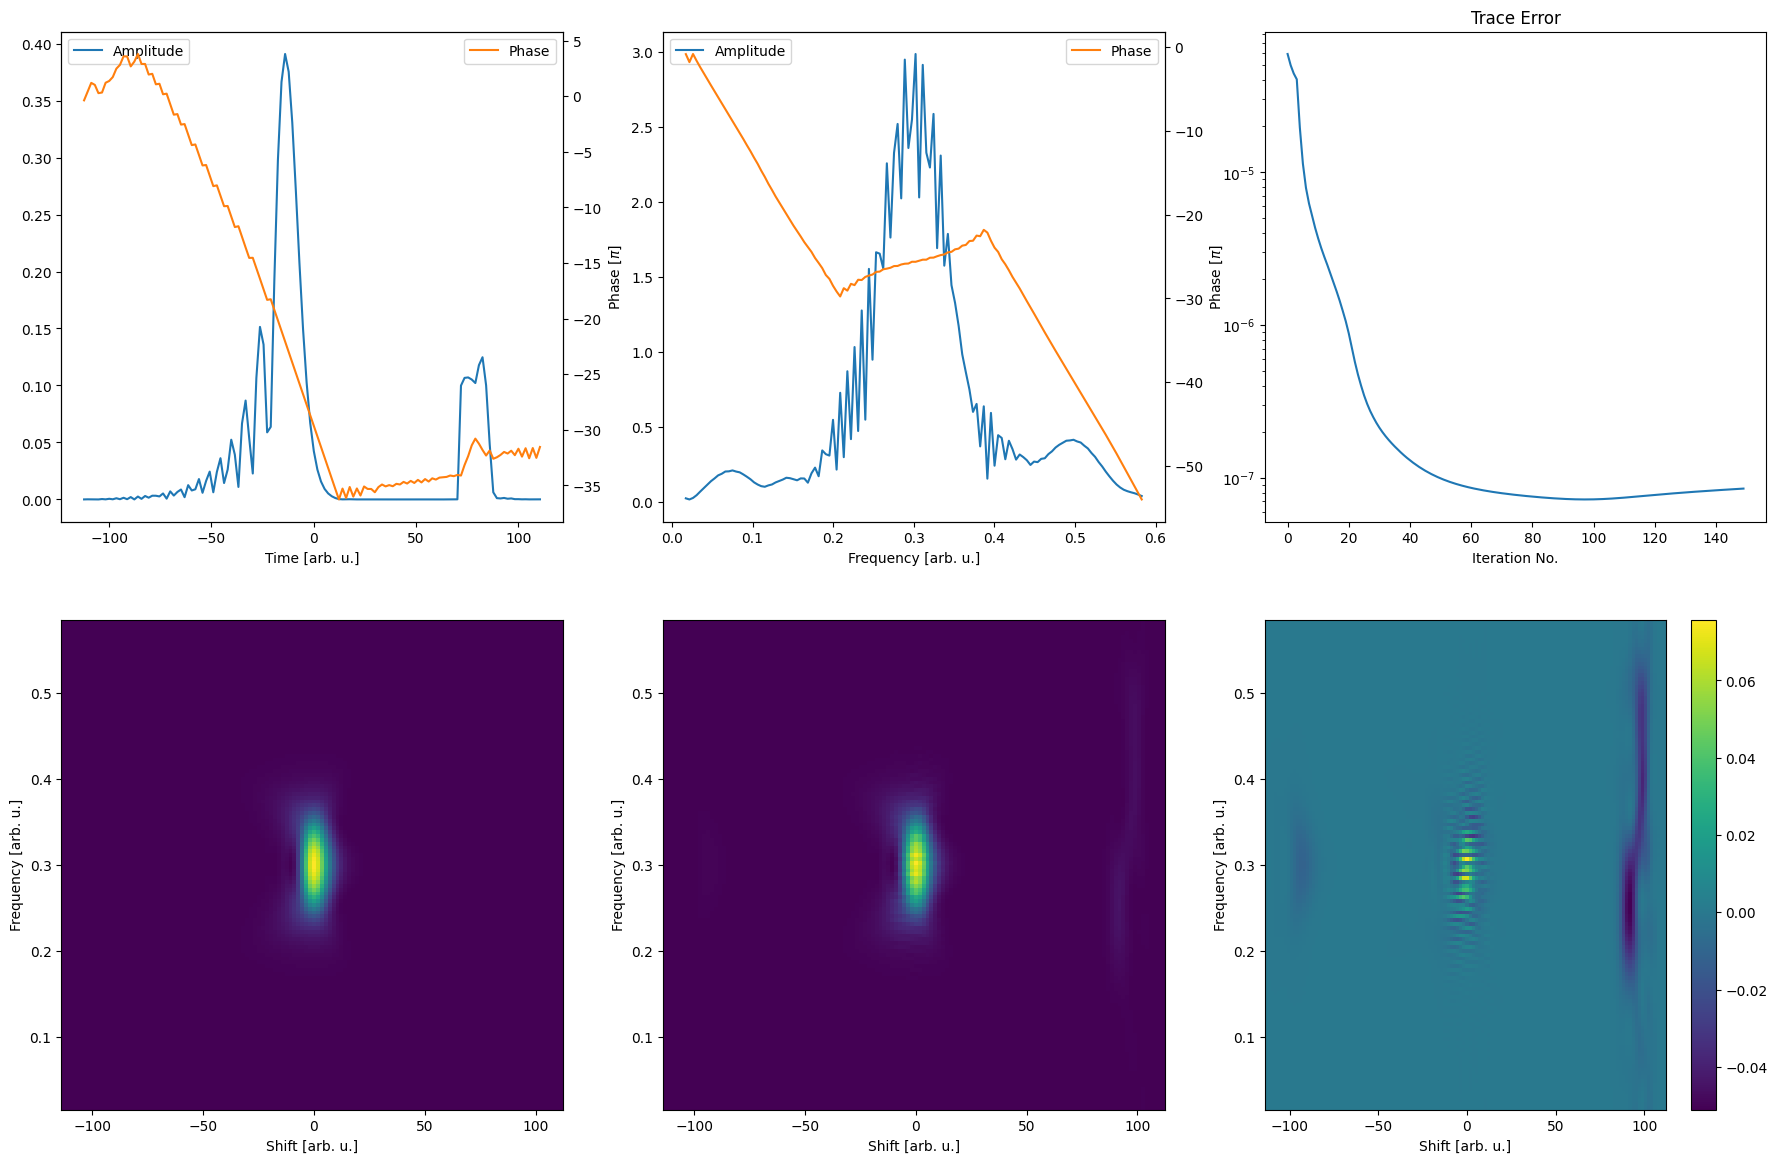

In [ ]:
# vanilla = Vanilla(time, frequency, trace, "pg")
# population = vanilla.create_initial_population(population_size=3, guess_type="random")

# final_result = vanilla.run(population, 100)
# vanilla.plot_results(final_result)






# lsgpa = LSGPA(time, frequency, trace, "pg", xfrog=False)#.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# population = lsgpa.create_initial_population(population_size=3, guess_type="random")

# final_result = lsgpa.run(population, 500)
# lsgpa.plot_results(final_result)






# gp = GeneralizedProjection(time, frequency, trace, "pg", xfrog=False)
# population = gp.create_initial_population(population_size=1, guess_type="random")

# gp.global_hessian = "lbfgs"
# gp.conjugate_gradients = False


# gp.no_steps_descent = 25
# gp.max_steps_linesearch = 15
# gp.use_linesearch = "zoom"
# gp.global_gamma = 1.0
# gp.delta_gamma = 2.0
# gp.c1 = 1e-4
# gp.c2 = 0.5

# # gp.lbfgs_memory = 3

# # gp.use_copra_style_step_scaling = False


# final_result = gp.run(population, 150)
# gp.plot_results(final_result)






# tdp = TimeDomainPtychography(time, frequency, trace, "sd", "ePIE", xfrog="doubleblind")
# population = tdp.create_initial_population(population_size=3, guess_type="random")

# tdp.alpha = 0.1
# tdp.local_gamma = 0.1
# tdp.global_gamma = 0.1

# tdp.lbfgs_memory = 15
# tdp.conjugate_gradients = False#"fletcher_reeves"

# tdp.global_hessian = "full" #"lbfgs"
# tdp.use_linesearch = "backtracking" #"wolfe"
# #tdp.lambda_lm = 1e-2

# final_result = tdp.run(population, 0, 150)
# tdp.plot_results(final_result)





# copra = COPRA(time, frequency, trace, "pg", ifrog=False)#, xfrog="doubleblind")
# population = copra.create_initial_population(population_size=5, guess_type="random")

# # copra.use_linesearch = False #"wolfe"

# # copra.local_gamma=1
# # copra.global_gamma=0.5
# # copra.local_adaptive_scaling = "original"
# # copra.global_adaptive_scaling = "original"
# # copra.xi=1e-12

# # copra.local_hessian=False
# # copra.global_hessian=False#"full"

# final_result = copra.run(population, 150, 100)
# copra.plot_results(final_result)



In [4]:
from classic_algorithms_dscan import Basic, GeneralizedProjection, TimeDomainPtychography, COPRA

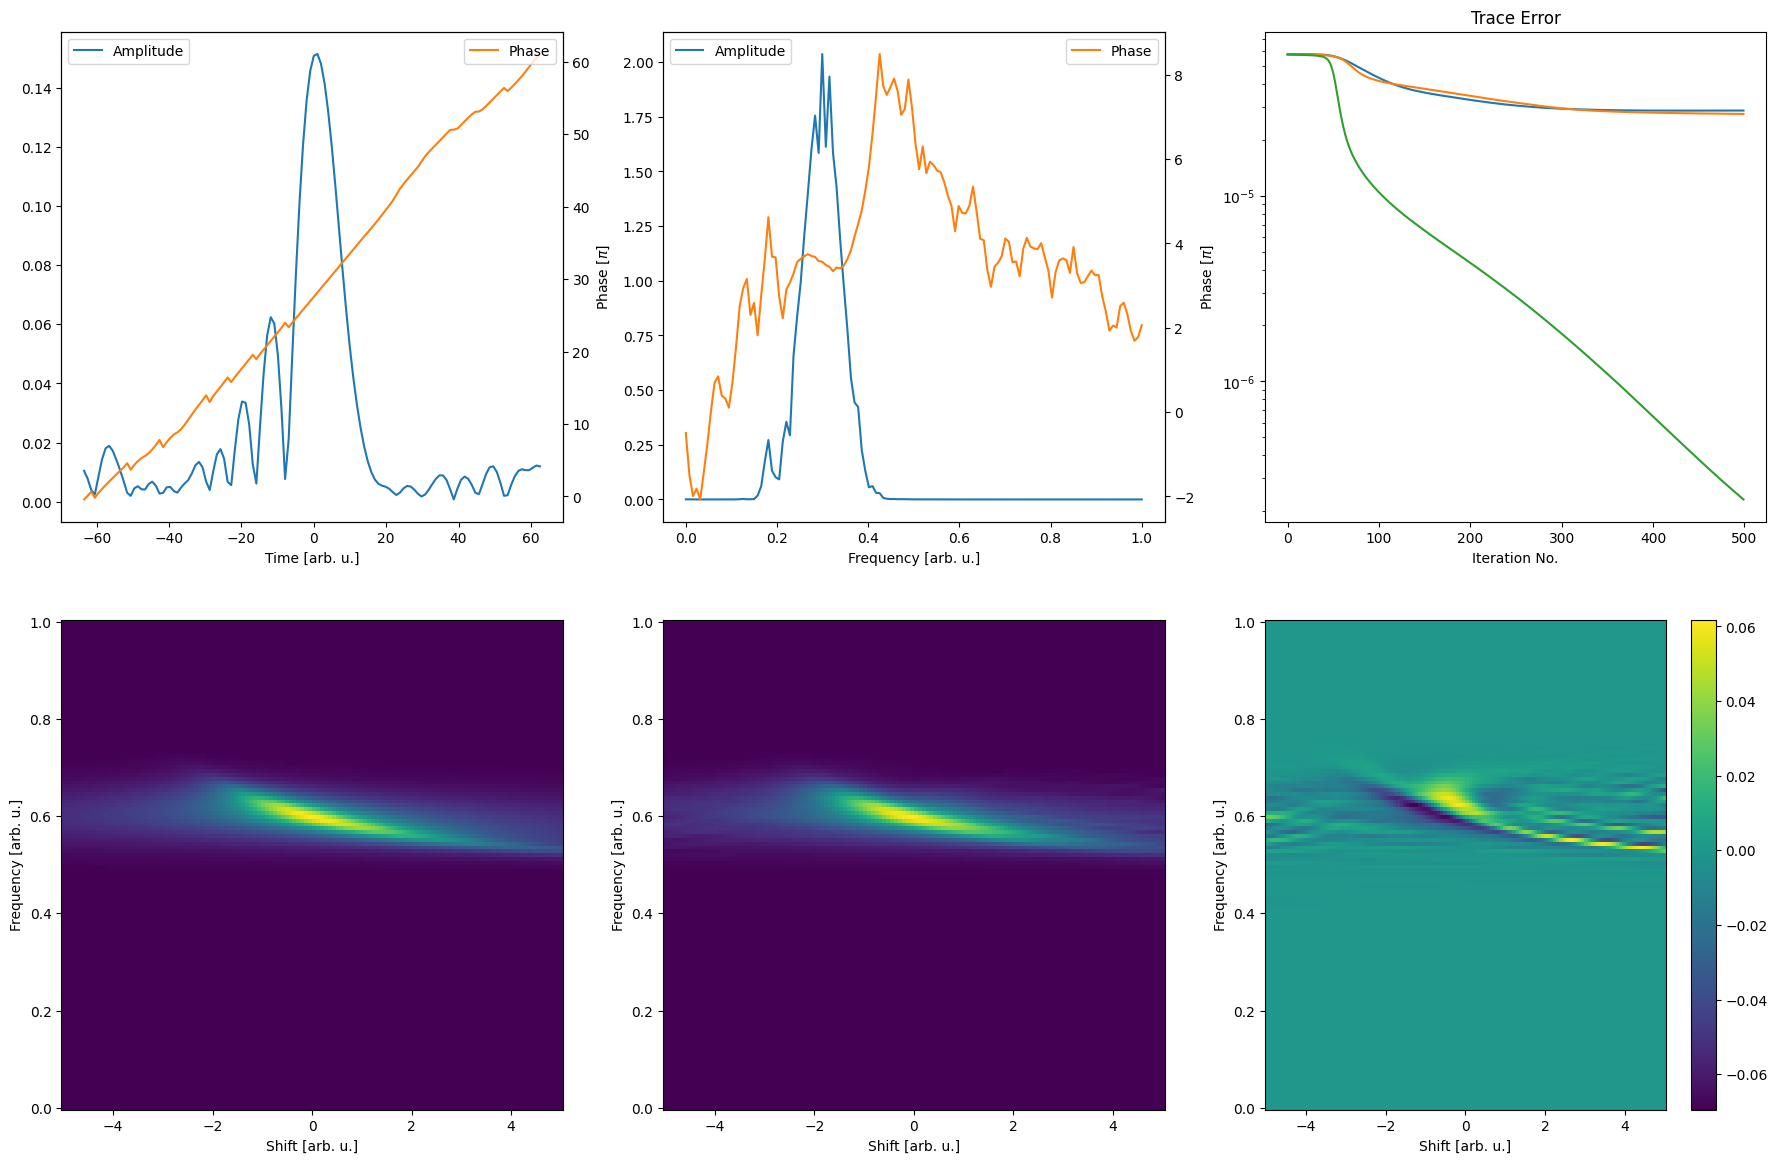

In [8]:
# basic = Basic(z_arr, frequency, trace, "shg")
# population = basic.create_initial_population(population_size=3, guess_type="random")

# final_result = basic.run(population, 100)
# basic.plot_results(final_result)





# gp = GeneralizedProjection(z_arr, frequency, trace, "shg")
# population = gp.create_initial_population(population_size=3, guess_type="random")

# # gp.global_hessian="lbfgs"#"diagonal"
# # gp.no_steps_descent=50
# # gp.gamma=1

# final_result = gp.run(population, 100)
# gp.plot_results(final_result)




tdp = TimeDomainPtychography(z_arr, frequency, trace, "shg", pie_method="rPIE")
population = tdp.create_initial_population(population_size=3, guess_type="random")

tdp.alpha=0.1
tdp.local_gamma=0.005
tdp.global_gamma=0.5

tdp.use_linesearch=False
tdp.global_hessian="diagonal"

final_result = tdp.run(population, 0, 500)
tdp.plot_results(final_result)






# copra = COPRA(z_arr, frequency, trace, "shg")
# population = copra.create_initial_population(population_size=3, guess_type="random")

# copra.local_gamma = 1
# copra.global_gamma = 0.25

# copra.local_hessian = False
# copra.global_hessian = False

# copra.adaptive_scaling = "linear"

# final_result = copra.run(population, 12, 15)
# copra.plot_results(final_result)

In [22]:
from general_algorithms_frog import DifferentialEvolution, Evosax, LSF, AutoDiff

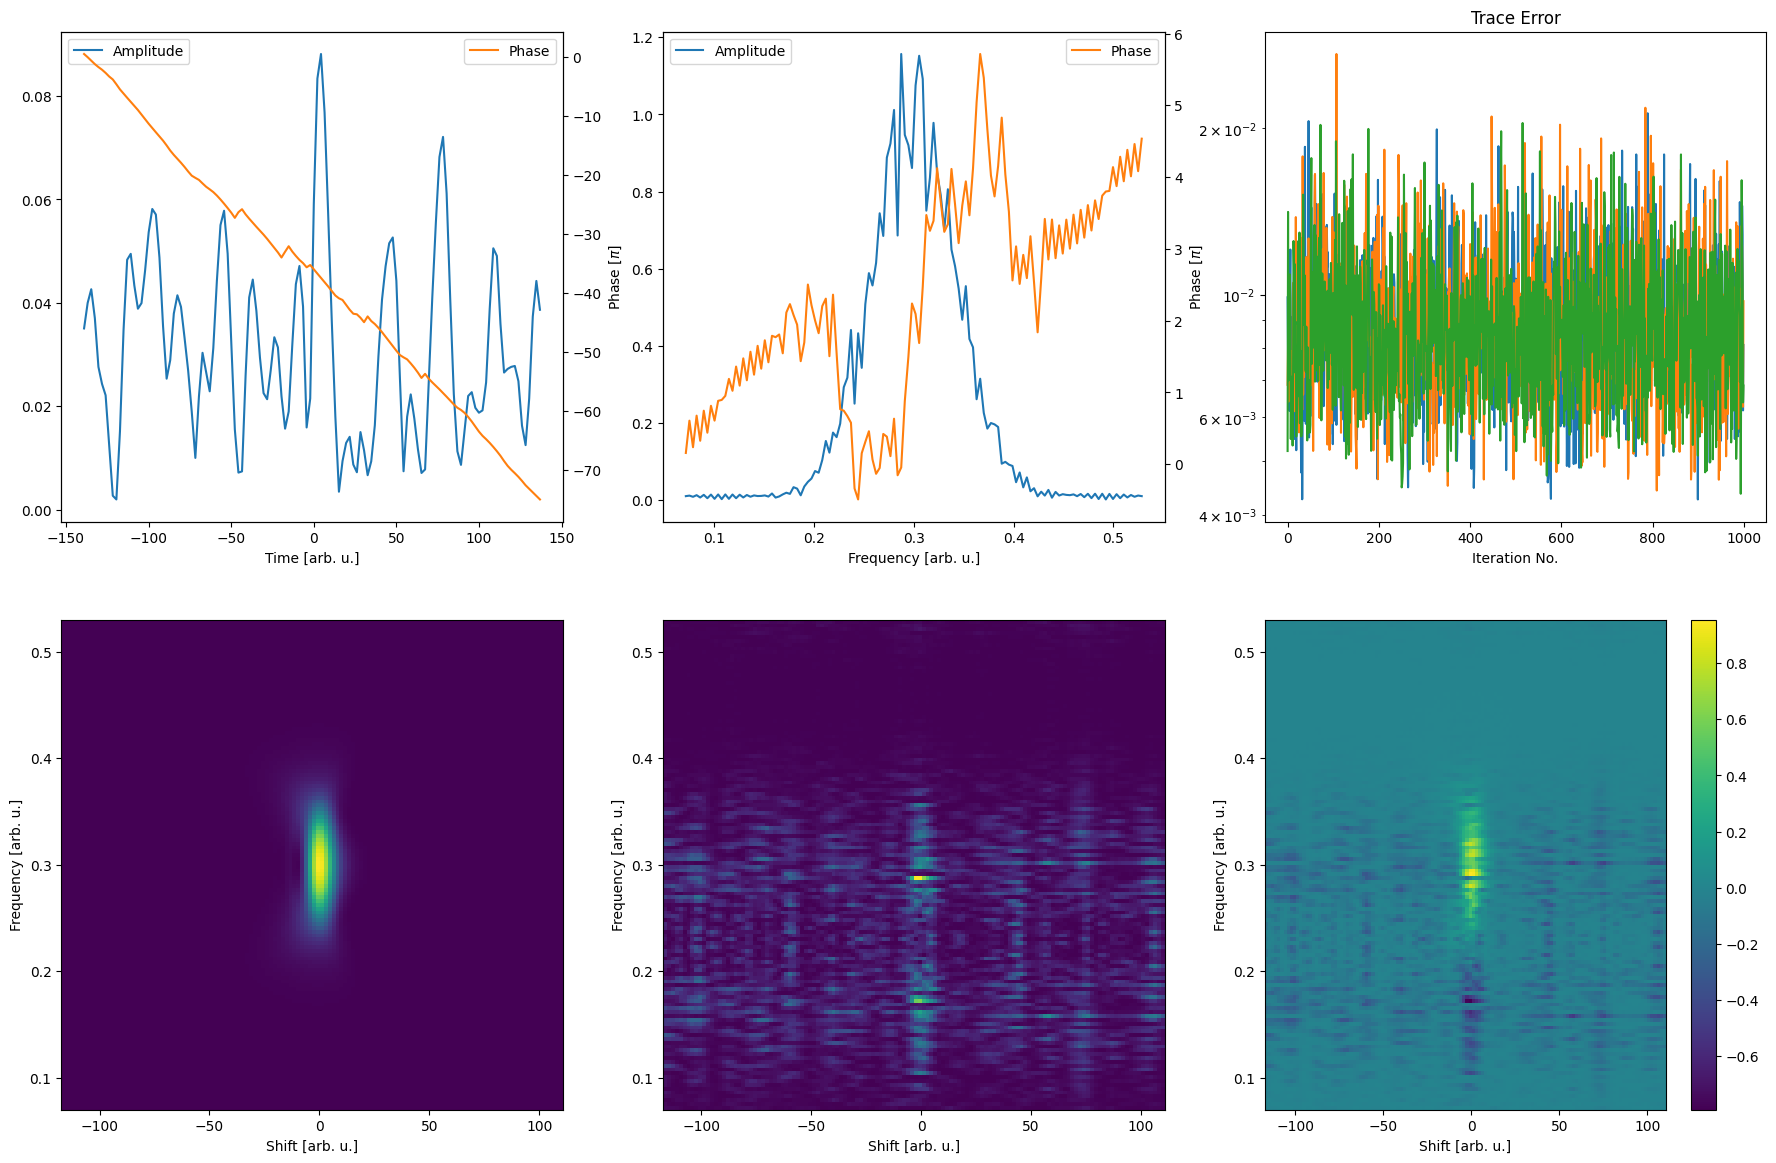

In [5]:
# de = DifferentialEvolution(time, frequency, trace, "pg", xfrog="doubleblind").use_measured_spectrum()
# spectral_amplitude = de.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = de.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = de.create_initial_population(population_size=250, amp_type="splines", phase_type="splines")

# de.strategy="best1_smooth"

# final_result = de.run(population, 150)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(time, frequency, trace, "pg", xfrog="doubleblind").use_measured_spectrum()
# spectral_amplitude = evo.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = evo.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = evo.create_initial_population(population_size=250)

# evo.solver = CMA_ES

# final_result = evo.run(population, 250)
# evo.plot_results(final_result)




lsf = LSF(time, frequency, trace, "pg", xfrog=False).use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")

population = lsf.create_initial_population(population_size=3, amp_type="discrete", phase_type="discrete")

lsf.number_of_bisection_iterations=12
lsf.random_direction_mode="random"
lsf.no_points_for_continuous=5

final_result = lsf.run(population, 1000)
lsf.plot_results(final_result)





# ad = AutoDiff(time, frequency, trace, "thg", xfrog="doubleblind").use_measured_spectrum()

# spectral_amplitude = ad.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = ad.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = ad.create_initial_population(population_size=1, amp_type="discrete", phase_type="discrete")

# ad.alternating_optimization = True
# ad.solver = optax.adam(learning_rate=1e-1)

# final_result = ad.run(population, 1000)
# ad.plot_results(final_result)

In [8]:
error_arr = jnp.copy(final_result.error_arr)

In [12]:
error_arr_rand_phase = jnp.copy(final_result.error_arr)

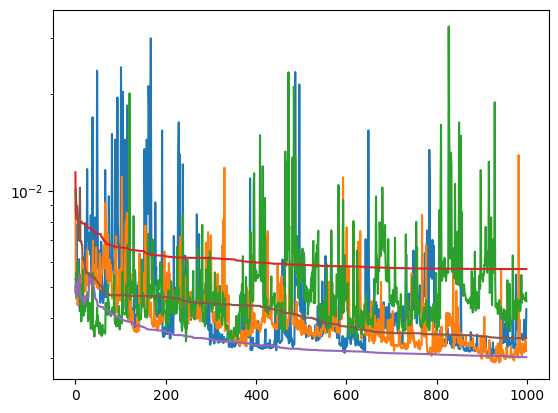

In [14]:
plt.plot(error_arr)
plt.plot(final_result.error_arr)
plt.yscale("log")

In [13]:
from general_algorithms_dscan import DifferentialEvolution, Evosax, LSF, AutoDiff

In [ ]:
# de = DifferentialEvolution(z_arr, frequency, trace, "shg")
# population = de.create_initial_population(population_size=150)

# final_result = de.run(population, 100)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(z_arr, frequency, trace, "shg")
# evo.solver = CMA_ES
# population = evo.create_initial_population(population_size=250)

# final_result = evo.run(population, 100)
# evo.plot_results(final_result)




lsf = LSF(z_arr, frequency, trace, "shg")
population = lsf.create_initial_population(population_size=3, amp_type="random", phase_type="random")

lsf.number_of_bisection_iterations=8
lsf.random_direction_mode="random"
lsf.no_points_for_continuous=15

final_result = lsf.run(population, 2000)
lsf.plot_results(final_result)





# ad = AutoGrad(z_arr, frequency, trace, "shg")
# population = ad.create_initial_population(population_size=1, amp_type="discrete", phase_type="discrete")

# ad.solver=optax.adam(learning_rate=1e-1)

# final_result = ad.run(population, 1000)
# ad.plot_results(final_result)